In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_recall_fscore_support
)
from scipy.stats import uniform

In [2]:

problem_types = ['regression','classification'] #regression or classification
input_type = '1_filter' #reduced features: 1_filter, genetic_algorithm, PCA, random_forest
seed = 254

In [3]:
def read_file(problem_type, input_file):
    """
    Read input features and recover target values (IC50 or Potency).

    Parameters:
        problem_type (str): 'regression' or 'classification'.
        input_file (str): Path to the input feature file.

    Returns:
        tuple:
            - X (pd.DataFrame): Original feature DataFrame.
            - X_indexed (pd.DataFrame): Feature DataFrame indexed by 'Molecule ChEMBL ID'.
            - target (pd.Series): Target values indexed by 'Molecule ChEMBL ID'.
    """
    # Load the input feature file
    X = pd.read_csv(input_file)

    # Load the target data file based on the problem type
    if problem_type == 'regression': 
        # For regression, retrieve '-logIC50' as the target column
        target = pd.read_csv('C:/Erdos_2024_DS/TRPM8-bootcamp-project/3_train_test_split/descriptors_all.csv')[['Molecule ChEMBL ID', '-logIC50']]
    elif problem_type == 'classification':
        # For classification, retrieve 'Potency' as the target column
        target = pd.read_csv('C:/Erdos_2024_DS/TRPM8-bootcamp-project/3_train_test_split/descriptors_all.csv')[['Molecule ChEMBL ID', 'Potency']]
    else:
        raise ValueError("Invalid problem_type. Must be 'regression' or 'classification'.")

    # Merge target data with the feature file based on 'Molecule ChEMBL ID'
    target = pd.merge(target, X[['Molecule ChEMBL ID']], on='Molecule ChEMBL ID')

    # Return the original feature DataFrame, indexed feature DataFrame, and target values
    return X, X.set_index('Molecule ChEMBL ID'), target.set_index('Molecule ChEMBL ID').squeeze()
    

In [11]:
os.path.join(base_dir, f"train_{problem}_{fold}.csv")

NameError: name 'base_dir' is not defined

In [13]:
problem_type

NameError: name 'problem_type' is not defined

In [31]:
def run_SVR(problem_type, input_type, seed=42):
    """
    Run Support Vector Regression algorithm for regression or classification with 5-fold cross-validation and hyperparameter optimization.
    Also plots data distribution for each fold.

    Parameters:
        problem_type (str): 'regression' or 'classification'.
        input_type (str): Directory of input feature reduction scheme (e.g., '1_filter').
        seed (int): Random seed for reproducibility.

    Returns:
        dict: Best model, test predictions, evaluation metrics, and test dataset.
    """

    # File paths
##    if input_type != 'genetic_algorithm':
    base_dir = "C:/Erdos_2024_DS/TRPM8-bootcamp-project/4_feature_selection/1_Filter"

##    else:
##        base_dir = f"../4_feature_selection/{input_type}/random_forest/"

    if problem_type == "regression":
        problem = "reg"  
    else: 
        problem = "class"
    train_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"train_{problem}")])
    val_files = sorted([f for f in os.listdir(base_dir) if f.startswith(f"val_{problem}")])
    test_file = os.path.join(base_dir, f"test_{problem}.csv")
    
    # Load test dataset
    test_df, X_test, y_test = read_file(problem_type, test_file)
####test_df = pd.read_csv(test_file)
####X_test = test_df.set_index('Molecule ChEMBL ID')
####target = pd.read_csv('C:/Erdos_2024_DS/3_train_test_split/descriptors_all.csv')[['Molecule ChEMBL ID', '-logIC50']]
####target = pd.merge(target, X[['Molecule ChEMBL ID']], on='Molecule ChEMBL ID')
####y_test = target.set_index('Molecule ChEMBL ID').squeeze()

    # Initialize hyperparameter distribution for RandomizedSearchCV
###    param_distributions = {
###        'n_estimators': [100],
###        'max_depth': [10],
###        'min_samples_split': [2],
###        'min_samples_leaf': [1],
###        'max_features': ['sqrt'],
###        'bootstrap': [True],
###    }
    # Initialize model
    if problem_type == "regression":
        param_dist = {
            'C': uniform(loc=0.01, scale=10),
            'epsilon': uniform(loc=0, scale=1)###,
###    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
###    'dual': [True, False]
        }
        model = SVR(kernel = 'poly')
        scoring = make_scorer(mean_squared_error, greater_is_better=False)
    elif problem_type == "classification":
        param_dist = {'C': uniform(loc=0.01, scale=10)}##'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
        model = SVC(kernel = 'rbf')
        scoring = "accuracy"  # Use default accuracy or optionally "f1_weighted"
    else:
        raise ValueError("Invalid problem_type. Choose 'regression' or 'classification'.")

    if problem_type == "regression":

        svr_lin = SVR(kernel = 'linear')
        svr_rbf = SVR(kernel = 'rbf')
        svr_poly = SVR(kernel = 'poly')
        



    elif problem_type == "classification":
        svc_lin = SVC(kernel = 'linear')
        svc_rbf = SVC(kernel = 'rbf')
        svc_poly = SVC(kernel = 'poly')

        

    else:
        raise ValueError("Invalid problem_type. Choose 'regression' or 'classification'.")


    # Perform 5-fold cross-validation
    print(f"Running 5-fold cross-validation for {problem_type}...")
    fold_metrics = []
    best_models = []

    for fold in range(1, 6):
        # Load train and validation files for the current fold
        train_file = os.path.join(base_dir, f"train_{problem}_{fold}.csv")
        val_file = os.path.join(base_dir, f"val_{problem}_{fold}.csv")

        # Load training and validation data
        train_df, X_train, y_train = read_file(problem_type, train_file)
        val_df, X_val, y_val = read_file(problem_type, val_file)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)

    if problem_type == "regression":

        svr_lin.fit(X_train_scaled, y_train)
        svr_rbf.fit(X_train_scaled, y_train)
        svr_poly.fit(X_train_scaled, y_train)

    elif problem_type == "classification":
        svc_lin.fit(X_train_scaled, y_train)
        svc_rbf.fit(X_train_scaled, y_train)
        svc_poly.fit(X_train_scaled, y_train)


        # Plot data distribution for the current fold
    plt.figure(figsize=(12, 6))
        
    if problem_type == "regression":
      

        # Plot IC50 distribution for regression
               
        sns.histplot(y_train, kde=True, label="Train", color="blue", bins=20, alpha=0.7)
        sns.histplot(y_val, kde=True, label="Validation", color="orange", bins=20, alpha=0.7)
        plt.xlabel("-log(IC50)")
        plt.ylabel("Count")
        plt.title(f"Data Distribution for Fold {fold} (Regression)")


    else:
       
        
        # Plot class distribution for classification
        sns.countplot(x=y_train, label="Train", color="blue", alpha=0.7)
        sns.countplot(x=y_val, label="Validation", color="orange", alpha=0.7)
        plt.xlabel("Class")
        plt.ylabel("Count")
        plt.title(f"Data Distribution for Fold {fold} (Classification)")

        plt.legend(["Train", "Validation"])
        plt.savefig(f"data_distribution_fold_{fold}_{problem_type}.png", dpi=150)
        plt.show()

        # Hyperparameter optimization using RandomizedSearchCV
####random_search = RandomizedSearchCV(
####            estimator=svr_lin,
####           param_distributions=param_distributions,
####            n_iter=50,  # Number of random parameter combinations to try
####            scoring=scoring,  # Use 'f1_weighted' for multiclass tasks
####            cv=3,  # Inner cross-validation
####            n_jobs=-1,  # Use all available CPU cores
####            verbose=1,
####            random_state=seed,
####        )
####random_search.fit(X_train, y_train)

        # Evaluate the best model on validation data
####best_model = random_search.best_estimator_
####best_models.append(best_model)

####y_val_pred = best_model.predict(X_val)

###param_dist = {
###    'C': [0.1, 1, 10, 100, 1000],
###    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
###    'kernel': ['rbf', 'linear']
###}


    svr=SVR
    svc=SVC
###random_search = RandomizedSearchCV(svr, parameters, cv=10, n_iter=1000, n_jobs=-1)
# Perform random search
    random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   random_state=42)

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_models.append(best_model)

    y_val_pred = best_model.predict(X_val)

    if problem_type == "regression":
            metric = mean_squared_error(y_val, y_val_pred)
    else:
            metric = accuracy_score(y_val, y_val_pred)

    fold_metrics.append(metric)
    print(f"Fold {fold} - Best Model Metric: {metric:.4f}")

    # Average metric across folds
    avg_metric = np.mean(fold_metrics)
    print(f"Average Cross-Validation Metric: {avg_metric:.4f}")

    # Evaluate the best model on the test set
    if problem_type == "regression":
        final_model = best_models[np.argmin(fold_metrics)]  # Best model with lowest MSE
        test_metric = mean_squared_error(y_test, final_model.predict(X_test))
        print(f"Test MSE: {test_metric:.4f}")
    else:
        final_model = best_models[np.argmax(fold_metrics)]  # Best model with highest accuracy
        test_metric = accuracy_score(y_test, final_model.predict(X_test))
        print(f"Test Accuracy: {test_metric:.4f}")

    return {
        'best_model': final_model,
        'test_predictions': final_model.predict(X_test),
        'test_metric': test_metric,
        'X_test': X_test,
        'y_test': y_test
    }

In [33]:
def evaluate_model(final_model, X_test, y_test, problem_type, input_type, model_type="SVR"):
    """
    Evaluate the model, create plots, and save performance summary and predictions.

    Parameters:
        final_model: Trained model.
        X_test (pd.DataFrame): Test feature set.
        y_test (pd.Series): True target values for the test set.
        problem_type (str): 'regression' or 'classification'.
        input_type (str): Feature reduction scheme used.
        model_type (str): Model type (default is 'random forest').

    Returns:
        None
    """
    # Generate file prefix based on naming convention
    file_prefix = f"{model_type}_{problem_type}_{input_type}"

    # Predictions
    y_pred = final_model.predict(X_test)

    # Evaluate based on problem type
    if problem_type == "regression":
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Save performance summary
        performance_summary = pd.DataFrame([{
            "model_type": model_type,
            "problem_type": problem_type,
            "input_type": input_type,
            "score": mse
        }])
        performance_summary.to_csv(f"{file_prefix}_performance_summary.csv", index=False)

        # Save predictions
        predictions = pd.DataFrame({
            "Molecule ChEMBL ID": X_test.index,
            "True IC50": y_test,
            "Predicted IC50": y_pred
        })
        predictions.to_csv(f"{file_prefix}_predictions.csv", index=False)

        # Plot Predicted vs Target
        plt.figure(figsize=(6, 6), dpi=150)
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
        plt.xlabel("True IC50")
        plt.ylabel("Predicted IC50")
        plt.title("Predicted vs Target")
        plt.savefig(f"{file_prefix}_predicted_vs_target.png")
        plt.show()

        # Plot Residuals
        residuals = y_test - y_pred
        plt.figure(figsize=(6, 6), dpi=150)
        plt.scatter(y_test, residuals, alpha=0.7)
        plt.axhline(0, color="red", linestyle="--")
        plt.xlabel("True IC50")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.savefig(f"{file_prefix}_residuals.png")
        plt.show()

    elif problem_type == "classification":
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")

        # Save performance summary
        performance_summary = pd.DataFrame([{
            "model_type": model_type,
            "problem_type": problem_type,
            "input_type": input_type,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1
        }])
        performance_summary.to_csv(f"{file_prefix}_performance_summary.csv", index=False)

        # Save predictions
        predictions = pd.DataFrame({
            "Molecule ChEMBL ID": X_test.index,
            "True Potency": y_test,
            "Predicted Potency": y_pred
        })
        predictions.to_csv(f"{file_prefix}_predictions.csv", index=False)


        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
        disp.plot(cmap="Blues", values_format="d")
        plt.title("Confusion Matrix")
        plt.savefig(f"{file_prefix}_confusion_matrix.png")
        plt.show()

        # Plot ROC Curve for each class
        y_proba = final_model.predict_proba(X_test)
        plt.figure(figsize=(8, 6), dpi=150)
###        for i, class_label in enumerate(final_model.classes_):
###            fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_proba[:, i])
###            roc_auc = auc(fpr, tpr)
###            plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

        train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
        test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

        plt.grid()

        plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
        plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))

        plt.plot([0, 1], [0, 1], color="red", linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (One-vs-Rest)")
        plt.legend()
        plt.grid(color='black', linestyle='-', linewidth=0.5)
        plt.savefig(f"{file_prefix}_roc_curve.png")
        plt.show()

Training SVR model for regression using 1_filter features...
Running 5-fold cross-validation for regression...
Fold 5 - Best Model Metric: 8.5895
Average Cross-Validation Metric: 8.5895
Test MSE: 11.0582
Training SVR model for classification using 1_filter features...
Running 5-fold cross-validation for classification...


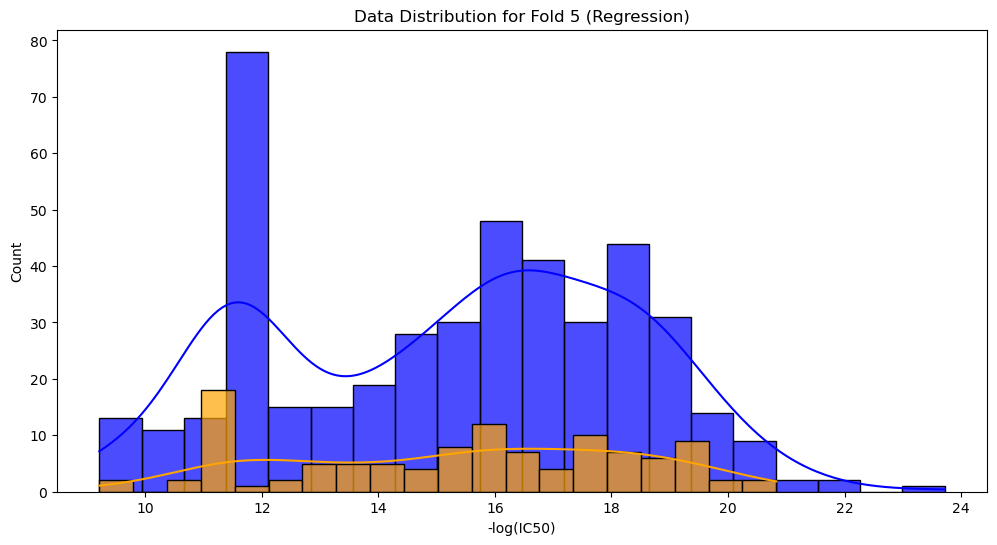

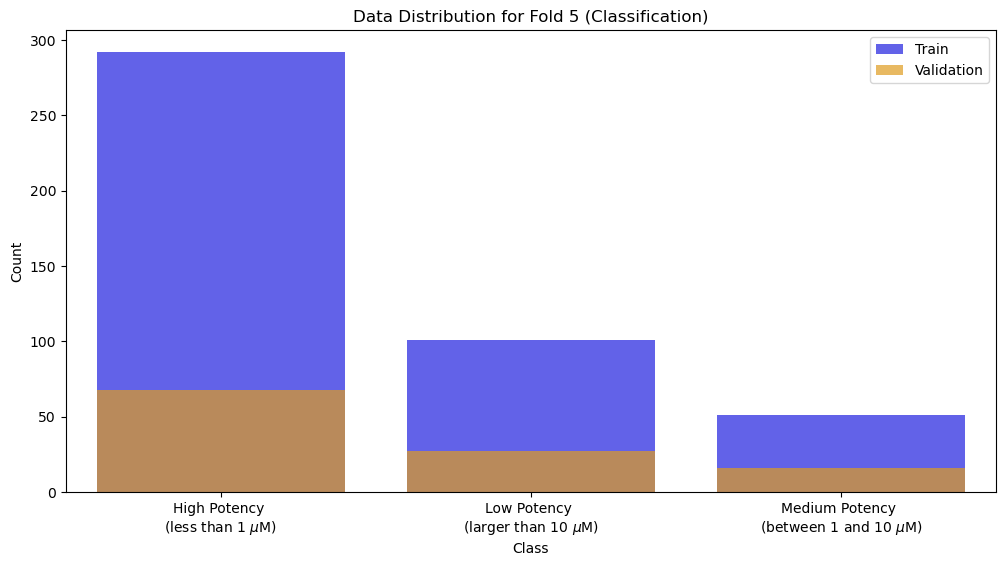

C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^

Fold 5 - Best Model Metric: 0.5495
Average Cross-Validation Metric: 0.5495
Test Accuracy: 0.6162


C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jle\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^

In [35]:
for problem_type in problem_types:
    print(f"Training SVR model for {problem_type} using {input_type} features...")
    results = run_SVR(problem_type=problem_type, input_type=input_type, seed=seed)
    
    # Unpack results
    final_model = results["best_model"]
    X_test = results["X_test"]
    y_test = results["y_test"]